In [1]:
import astropy.units as u
import astropy.coordinates as coord
from astropy.io import ascii
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Via: http://mnras.oxfordjournals.org/content/440/1/161.full.pdf
$$
\rho_{\rm RR} = \rho_0 (R_\odot/r)^\alpha\\
r^2 = x^2 + y^2 + z^2/q^2\\
x = D\cos{l}\cos{b} - R_\odot\\
y = D\sin{l}\cos{b}\\
z = D\sin{b}
$$

From Sesar et al. (2013) (LINEAR RR Lyrae), 
$$
\alpha = 2.42\\
q = 0.63\\
\rho_0 = 5.6~N_{\rm RRL}~{\rm kpc}^{-3}
$$

Just need to compute:
$$
N = \int \rho_{\rm RR} D^2\cos{b}~{\rm d}D~{\rm d}l~{\rm d}b
$$

Am I reading eq. 3 right? Is this saying
$$
\frac{{\rm d}N}{{\rm d}l{\rm d}b} \approx D^2 \rho(D,l,b) \cos b \Delta D
$$
(btw: mistake w/ equation? has $\rho_\odot$ twice?)

I don't understand why this sucks so bad, but look at Mathematica for answer

In [3]:
def func(D, l, b, dD, dl, db):
    q = 0.63
    alpha = 2.42
    rho0 = 5.6 / u.kpc**3
    Rsun = 8. * u.kpc
    
    x = D*np.cos(l)*np.cos(b) - Rsun
    y = D*np.sin(l)*np.cos(b)
    z = D*np.sin(b) / q
    
    r = np.sqrt(x**2 + y**2 + z**2)
    
    return D**2 * rho0 * (Rsun / r)**alpha * np.cos(b) * dD * dl.to(u.radian).value * db.to(u.radian).value

In [4]:
D_bin_edges = np.linspace(0.,30,20.)*u.kpc
D_bin_cntrs = (D_bin_edges[1:] + D_bin_edges[:-1]) / 2.
D_bin_size = D_bin_edges[1] - D_bin_edges[0]

In [5]:
# try to reproduce HerAq plot
dens = func(D_bin_cntrs, 40.*u.deg, 57.5*u.deg, D_bin_size, dl=80*u.deg, db=35.*u.deg) # HerAq
# dens = func(D_bin_cntrs, 130.*u.deg, -25*u.deg, D_bin_size) # TriAnd

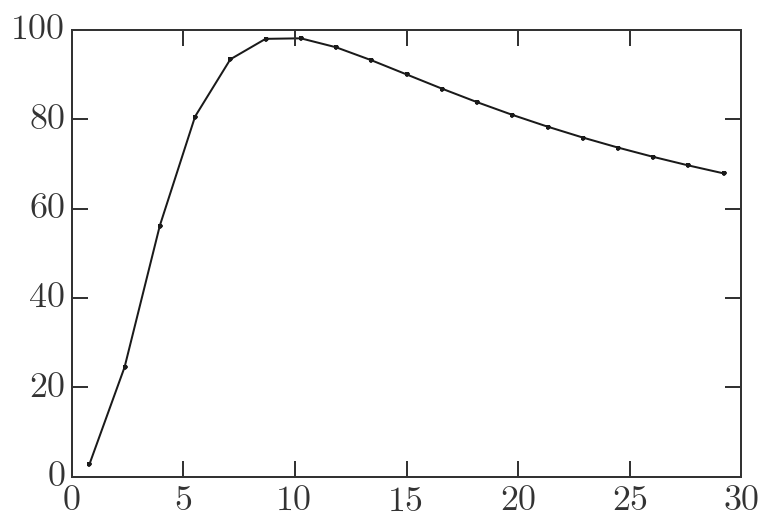

In [6]:
plt.plot(D_bin_cntrs, dens)

From mathematica:

In [7]:
bins = np.arange(0,40+2,2)
bin_ctr = (bins[1:]+bins[:-1])/2.
vals = np.array([3.63727, 17.6568, 31.8046, 41.6187, 47.4271, 50.4524, 51.7125, 51.892, 51.423, 50.5729, 49.5077, 48.33, 47.1042, 45.8698, 44.6517, 43.4645, 42.3168, 41.2132, 40.1556, 39.1443, 38.1786])

In [2]:
# this contains all Catalina RR Lyrae stars
# tbl = ascii.read("/Users/adrian/projects/streams/data/catalog/Catalina_all_RRLyr.txt")
tbl = ascii.read("/Users/adrian/Downloads/catalina.csv")
# tbl.remove_column("Num")
c = coord.SkyCoord(ra=tbl['ra'].data*u.deg, dec=tbl['dec'].data*u.deg)
gal = c.galactic

(-75, 0)

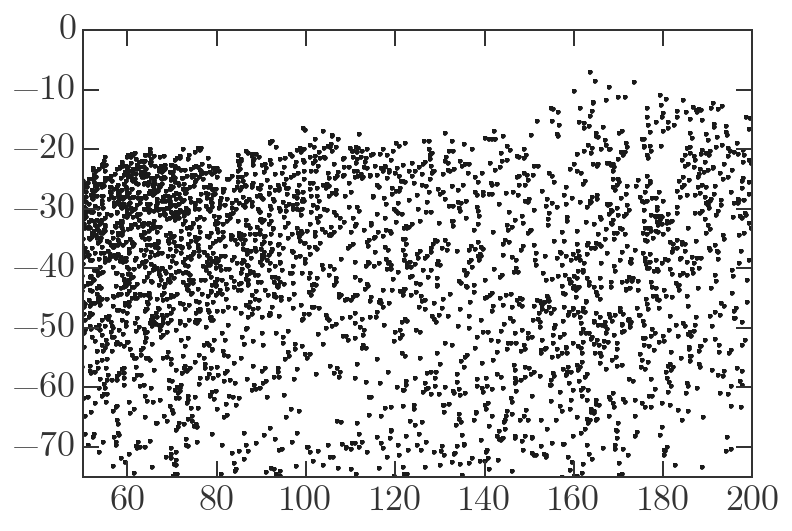

In [27]:
plt.plot(gal.l.degree[tbl['helio_dist'] < 50], 
         gal.b.degree[tbl['helio_dist'] < 50], 
         linestyle='none')
plt.xlim(50,200)
plt.ylim(-75,0)

In [20]:
# box = [100,160,-35,-15]*u.degree
box = [250,350,40,60]*u.degree # side box 1

ix = ((c.galactic.l > box[0]) & (c.galactic.l < box[1]) & 
      (c.galactic.b > box[2]) & (c.galactic.b < box[3]))
triand = tbl[ix].filled()
d = triand['helio_dist'].data

In [21]:
((d > 15) & (d < 21)).sum() # / 0.8

265

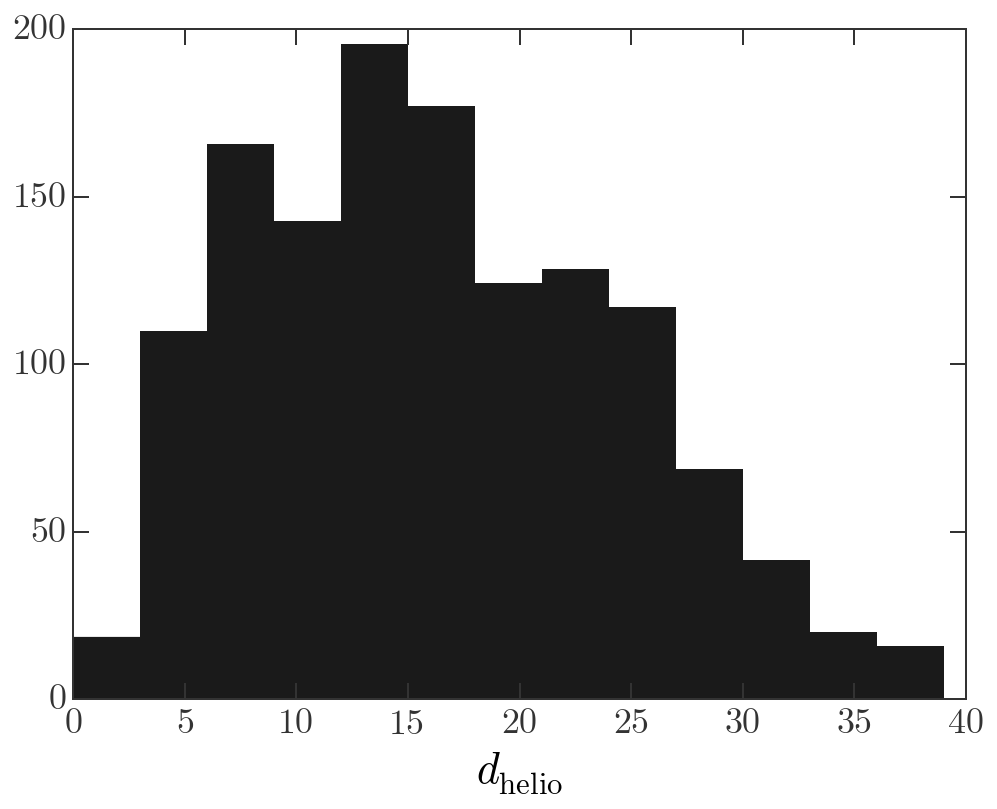

In [15]:
plt.figure(figsize=(8,6))
# plt.errorbar(bin_ctr, vals[:-1], np.sqrt(vals[:-1]), ecolor='#777777', marker='o')

bins2 = np.arange(0,40+2,3)
plt.hist(d, bins=bins2, weights=np.ones_like(d)/0.7);
plt.xlabel(r"$d_{\rm helio}$")